In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_csv_dataX = pd.read_csv("C:\\Users\Diana\Documents\GEOMAG2020\Desarrollos R y Python\Data\Datos EBR\DatosX.csv") 
df_comp=raw_csv_dataX.copy() 

In [3]:
del df_comp['Unnamed: 0']
del df_comp['MJD']

In [4]:
df_comp.Date = pd.to_datetime(df_comp.Date, yearfirst = True)

In [5]:
df_comp.set_index("Date", inplace=True)

In [6]:
df_comp_dia = df_comp.resample('D').mean()
df_comp_dia.head(10)

,X
Date,
2000-01-01,24859.449107
2000-01-02,24865.713851
2000-01-03,24871.466817
2000-01-04,24874.383035
2000-01-05,24866.324492
2000-01-06,24860.641167
2000-01-07,24870.123255
2000-01-08,24875.717098
2000-01-09,24880.068228


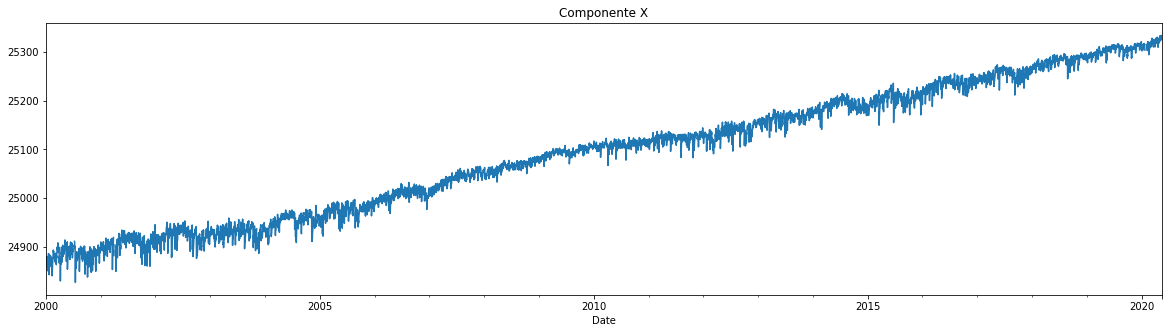

In [7]:
df_comp_dia.X.plot(figsize=(20,5), title = "Componente X")
plt.show()

In [8]:
df_comp_dia.X.isna().sum()

32

In [9]:
df_comp_dia.X=df_comp_dia.X.fillna(method='ffill')

In [10]:
df_comp_dia.X.isna().sum()

0

In [11]:
df_comp_dia.head()

,X
Date,
2000-01-01,24859.449107
2000-01-02,24865.713851
2000-01-03,24871.466817
2000-01-04,24874.383035
2000-01-05,24866.324492


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

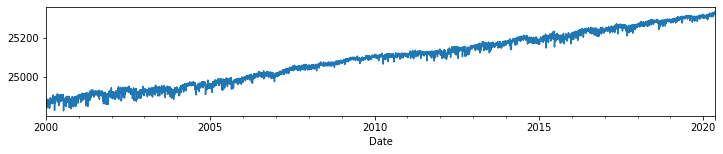

In [13]:
results = seasonal_decompose(df_comp_dia['X'])
results.observed.plot(figsize=(12,2))

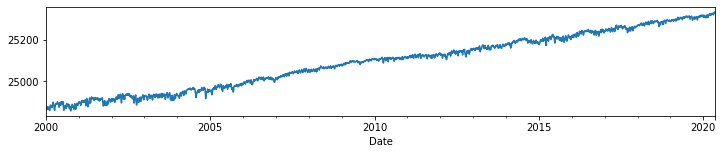

In [14]:
results.trend.plot(figsize=(12,2))

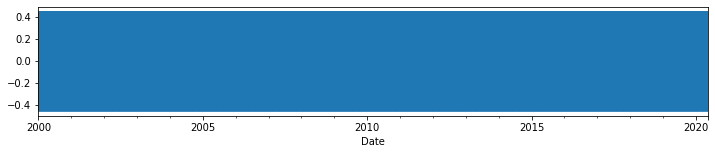

In [15]:
results.seasonal.plot(figsize=(12,2))

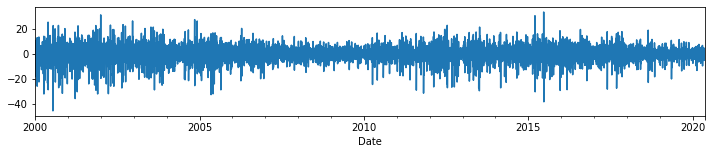

In [16]:
results.resid.plot(figsize=(12,2))

### Dividir el conjunto en entrenamiento y prueba

In [ ]:
sample = int(len(df_comp_dia)*0.8)

In [ ]:
df_comp_dia1 = df_comp_dia.iloc[:sample]

In [ ]:
df_comp_dia2 = df_comp_dia.iloc[sample:]

In [ ]:
df_comp_dia1.tail()

In [ ]:
df_comp_dia2.tail()

### Se dividen los datos 5 años para test (1827 días)

In [17]:
train = df_comp_dia.iloc[:len(df_comp_dia)-1827]
test = df_comp_dia.iloc[len(df_comp_dia)-1827:]

In [18]:
len(test)

1827

In [19]:
len(train)

5614

### Escalando los datos (normalización)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

### Se entrena el scaler con los datos de entrenamiento 

In [22]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

### Se transforman todos los datos tanto entrenamiento y prueba con el scaler

In [23]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

Este generador toma una secuencia de puntos de datos (como una serie temporal) espaciados en intervalos iguales, teniendo en cuenta otros parámetros de series temporales, para producir batches para el entrenamiento / validación.

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
scaled_train

array([[0.08181253],
       [0.09770391],
       [0.11229709],
       ...,
       [0.91055945],
       [0.94021431],
       [0.94873441]])

In [27]:
# Definimos el generator
n_input = 731
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [28]:
len(scaled_train)

5614

In [29]:
len(generator) # n_input = 365

4883

In [30]:
scaled_train[:5]

array([[0.08181253],
       [0.09770391],
       [0.11229709],
       [0.11969447],
       [0.09925288]])

In [31]:
# ¿Cómo luce el primer batch?
generator[0]

(array([[[0.08181253],
         [0.09770391],
         [0.11229709],
         [0.11969447],
         [0.09925288],
         [0.08483635],
         [0.10888896],
         [0.1230785 ],
         [0.13411573],
         [0.1323526 ],
         [0.10024643],
         [0.06088666],
         [0.10208418],
         [0.11057351],
         [0.12279247],
         [0.12158417],
         [0.12843034],
         [0.1332501 ],
         [0.15013433],
         [0.13607818],
         [0.14635472],
         [0.10821604],
         [0.04021991],
         [0.0734044 ],
         [0.11658818],
         [0.12244369],
         [0.14297801],
         [0.10527932],
         [0.09026686],
         [0.11300128],
         [0.12554103],
         [0.13579069],
         [0.13702873],
         [0.13518787],
         [0.13408728],
         [0.12525916],
         [0.09487263],
         [0.08071013],
         [0.10636031],
         [0.1194631 ],
         [0.12701365],
         [0.12821948],
         [0.03461085],
         [0

In [32]:
X,y = generator[0]

In [33]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.08181253 0.09770391 0.11229709 0.11969447 0.09925288 0.08483635
 0.10888896 0.1230785  0.13411573 0.1323526  0.10024643 0.06088666
 0.10208418 0.11057351 0.12279247 0.12158417 0.12843034 0.1332501
 0.15013433 0.13607818 0.14635472 0.10821604 0.04021991 0.0734044
 0.11658818 0.12244369 0.14297801 0.10527932 0.09026686 0.11300128
 0.12554103 0.13579069 0.13702873 0.13518787 0.13408728 0.12525916
 0.09487263 0.08071013 0.10636031 0.1194631  0.12701365 0.12821948
 0.03461085 0.06097393 0.07045993 0.0962524  0.10561066 0.11918236
 0.13972693 0.15464705 0.16870085 0.15705185 0.16119705 0.1579961
 0.13480406 0.12729435 0.13317823 0.12744916 0.13138492 0.13644759
 0.10737115 0.1249036  0.14011152 0.14522333 0.15140103 0.15054352
 0.12811648 0.10098036 0.13568905 0.13056522 0.09223915 0.13907456
 0.12659274 0.13889796 0.16003498 0.17898113 0.18346481 0.17281813
 0.18369612 0.18290469 0.20623045 0.20223139 0.168748   0.1561617
 0.16675033 0.1843669  0.18441372 0.17494271 0.18120491 0.

# Creando el modelo

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#### model.add(Dense(1)) - una sola predicción

In [60]:
# define model
model = Sequential()
model.add(LSTM(110, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 110)               49280     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 111       
Total params: 49,391
Trainable params: 49,391
Non-trainable params: 0
_________________________________________________________________


In [62]:
# fit model
model.fit_generator(generator,epochs=20)

Epoch 1/20
4883/4883 [==============================] - 1236s 253ms/step - loss: 0.0011
Epoch 2/20
4883/4883 [==============================] - 1224s 251ms/step - loss: 5.8118e-04
Epoch 3/20
4883/4883 [==============================] - 5233s 1s/step - loss: 5.2691e-04
Epoch 4/20
4883/4883 [==============================] - 1729s 354ms/step - loss: 4.9411e-04
Epoch 5/20
4883/4883 [==============================] - 40081s 8s/step - loss: 4.8949e-04
Epoch 6/20
4883/4883 [==============================] - 1259s 258ms/step - loss: 4.7513e-04
Epoch 7/20
4883/4883 [==============================] - 1249s 256ms/step - loss: 4.6040e-04
Epoch 8/20
4883/4883 [==============================] - 1296s 265ms/step - loss: 4.5240e-04
Epoch 9/20
4883/4883 [==============================] - 1263s 259ms/step - loss: 4.5574e-04
Epoch 10/20
4883/4883 [==============================] - 1229s 252ms/step - loss: 4.4716e-04
Epoch 11/20
4883/4883 [==============================] - 1231s 252ms/step - loss: 4.4117

In [63]:
model.history.history.keys()

dict_keys(['loss'])

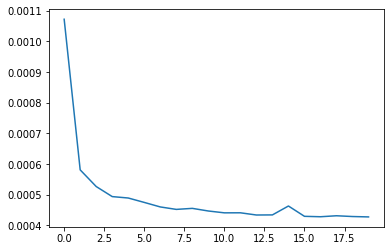

In [64]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluando en los Datos de Prueba (Test)

In [65]:
# 365 dias de historia ---> predecir el 366
# Necesitaremos los últimos 365 dias del conjunto de entrenamiento para predecir el 1er dia en el conjunto de prueba
first_eval_batch = scaled_train[-731:]

In [66]:
first_eval_batch

array([[0.88735082],
       [0.87261448],
       [0.85167304],
       [0.81753589],
       [0.80264022],
       [0.85393681],
       [0.85131544],
       [0.87066117],
       [0.86788196],
       [0.8541215 ],
       [0.80358628],
       [0.81168896],
       [0.82634226],
       [0.83550586],
       [0.84723692],
       [0.86423079],
       [0.88354481],
       [0.79327663],
       [0.80482278],
       [0.83387484],
       [0.83707716],
       [0.84637288],
       [0.84195138],
       [0.81086636],
       [0.8459154 ],
       [0.86432363],
       [0.84989206],
       [0.85530043],
       [0.86405323],
       [0.85906426],
       [0.87772851],
       [0.87440922],
       [0.8722973 ],
       [0.87349069],
       [0.85775047],
       [0.88332391],
       [0.89459609],
       [0.858823  ],
       [0.85051024],
       [0.84968495],
       [0.82033061],
       [0.83592158],
       [0.84470627],
       [0.85293167],
       [0.8217184 ],
       [0.75656748],
       [0.81381058],
       [0.828

In [68]:
X.shape

(1, 731, 1)

In [69]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [70]:
first_eval_batch.shape

(1, 731, 1)

In [71]:
model.predict(first_eval_batch)

array([[0.9455863]], dtype=float32)

In [72]:
scaled_test

array([[0.97428274],
       [0.98635836],
       [0.99081386],
       ...,
       [1.27940516],
       [1.27940516],
       [1.28488693]])

### Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba.

In [73]:
n_input=731

In [74]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [75]:
test_predictions

[array([0.9455863], dtype=float32),
 array([0.9428133], dtype=float32),
 array([0.9410756], dtype=float32),
 array([0.9397539], dtype=float32),
 array([0.9385723], dtype=float32),
 array([0.93744266], dtype=float32),
 array([0.93634266], dtype=float32),
 array([0.935268], dtype=float32),
 array([0.9342184], dtype=float32),
 array([0.9331939], dtype=float32),
 array([0.9321943], dtype=float32),
 array([0.93121886], dtype=float32),
 array([0.9302673], dtype=float32),
 array([0.92933935], dtype=float32),
 array([0.9284339], dtype=float32),
 array([0.92755055], dtype=float32),
 array([0.92668873], dtype=float32),
 array([0.9258476], dtype=float32),
 array([0.92502654], dtype=float32),
 array([0.92422533], dtype=float32),
 array([0.92344284], dtype=float32),
 array([0.92267895], dtype=float32),
 array([0.921933], dtype=float32),
 array([0.92120457], dtype=float32),
 array([0.92049325], dtype=float32),
 array([0.91979814], dtype=float32),
 array([0.91911906], dtype=float32),
 array([0.918455

In [76]:
scaled_test

array([[0.97428274],
       [0.98635836],
       [0.99081386],
       ...,
       [1.27940516],
       [1.27940516],
       [1.28488693]])

In [77]:
true_predictions = scaler.inverse_transform(test_predictions)

In [78]:
true_predictions

array([[25199.96853438],
       [25198.87533589],
       [25198.19031277],
       ...,
       [25176.4672811 ],
       [25176.4672811 ],
       [25176.4672811 ]])

In [79]:
test

,X,Predictions
Date,,
2015-05-16,25211.281319,25209.219107
2015-05-17,25216.041806,25216.433033
2015-05-18,25217.798264,25220.446339
2015-05-19,25204.305833,25224.703337
2015-05-20,25208.360694,25227.189186
...,...,...
2020-05-11,25326.511319,25264.358029
2020-05-12,25331.725764,25264.358029
2020-05-13,25331.567569,25264.358029


In [80]:
test['Predictions'] = true_predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
test

,X,Predictions
Date,,
2015-05-16,25211.281319,25199.968534
2015-05-17,25216.041806,25198.875336
2015-05-18,25217.798264,25198.190313
2015-05-19,25204.305833,25197.669255
2015-05-20,25208.360694,25197.203441
...,...,...
2020-05-11,25326.511319,25176.467281
2020-05-12,25331.725764,25176.467281
2020-05-13,25331.567569,25176.467281


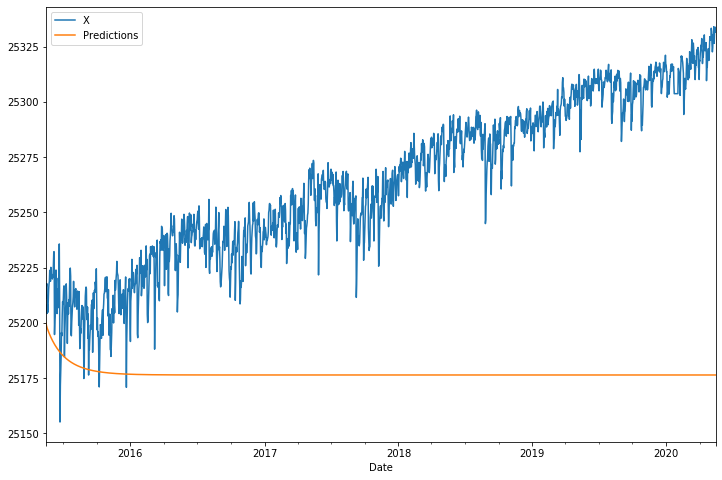

In [82]:
test.plot(figsize=(12,8))